<a href="https://colab.research.google.com/github/teim-projects/Group3_Fouling_Factor_Prediction_in_Heat_Exchanger/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import tensorflow as tf
import numpy as np

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False


In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.2 MB/s eta 0:00:00
time: 333 µs (started: 2023-04-21 04:59:50 +00:00)


In [ ]:
df=pd.read_csv('/content/HeatExchanger_data.csv')
df=df.dropna()

time: 19.1 ms (started: 2023-04-21 04:59:50 +00:00)


In [ ]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Crude Temp In,Crude Temp Out,CDU1 rate \n(KBPD),Crude Flow rate (kg/hr),Kero Temp In,Kero Temp Out,Kero Flow m3/hr,Furnace inlet temp (deg C),Crude Temp Increase,Kero Temp decrease,Q (heat exchanged) MW,Hot-in - Cold-out,Hot-out -Cold-in,LMTD,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance
Crude Temp In,1.000000,0.931119,-0.390183,-0.390183,0.469807,0.424535,0.130947,0.843289,0.233558,-0.082490,0.044658,0.029428,0.092305,0.070072,-0.031409,0.255113,0.068596
Crude Temp Out,0.931119,1.000000,-0.406537,-0.406536,0.673935,0.572012,0.315392,0.858180,0.572025,-0.015559,0.364140,0.253380,0.280296,0.273714,0.063043,0.243255,0.001344
CDU1 rate \n(KBPD),-0.390183,-0.406537,1.000000,1.000000,-0.308361,-0.169458,0.473871,-0.327055,-0.205459,-0.249310,0.298542,-0.148027,-0.040208,-0.073331,0.307640,-0.437939,-0.404035
Crude Flow rate (kg/hr),-0.390183,-0.406536,1.000000,1.000000,-0.308360,-0.169458,0.473871,-0.327054,-0.205458,-0.249310,0.298543,-0.148027,-0.040208,-0.073331,0.307640,-0.437940,-0.404036
Kero Temp In,0.469807,0.673935,-0.308361,-0.308360,1.000000,0.938120,0.523966,0.334339,0.739340,-0.271420,0.572367,0.885444,0.855722,0.874838,-0.374904,0.639156,0.451130
Kero Temp Out,0.424535,0.572012,-0.169458,-0.169458,0.938120,1.000000,0.633323,0.240776,0.569381,-0.587935,0.476348,0.868534,0.940733,0.927949,-0.540135,0.673981,0.583594
Kero Flow m3/hr,0.130947,0.315392,0.473871,0.473871,0.523966,0.633323,1.000000,0.201497,0.545282,-0.536247,0.773042,0.487675,0.647449,0.607449,0.042734,-0.016965,-0.066267
Furnace inlet temp (deg C),0.843289,0.858180,-0.327055,-0.327054,0.334339,0.240776,0.201497,1.000000,0.392104,0.111785,0.227293,-0.102069,-0.051084,-0.067619,0.277123,-0.121516,-0.246827
Crude Temp Increase,0.233558,0.572025,-0.205459,-0.205458,0.739340,0.569381,0.545282,0.392104,1.000000,0.144526,0.870667,0.608245,0.538694,0.571117,0.240059,0.073314,-0.152073
Kero Temp decrease,-0.082490,-0.015559,-0.249310,-0.249310,-0.271420,-0.587935,-0.536247,0.111785,0.144526,1.000000,0.013071,-0.345608,-0.615685,-0.535504,0.625440,-0.380184,-0.568173


time: 28 ms (started: 2023-04-21 04:59:50 +00:00)


In [ ]:
df

,date,Crude Temp In,Crude Temp Out,CDU1 rate \n(KBPD),Crude Flow rate (kg/hr),Kero Temp In,Kero Temp Out,Kero Flow m3/hr,Furnace inlet temp (deg C),Crude Temp Increase,Kero Temp decrease,Q (heat exchanged) MW,Hot-in - Cold-out,Hot-out -Cold-in,LMTD,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance
0,10-08-2012,154.797468,177.4809,92.3039,422179.6756,271.043339,190.6146,136.8106,207.5520,22.683415,80.428749,6.969547,93.562456,35.817122,60.138664,207.988664,1.062216e+05,0.004808
1,11-08-2012,161.205191,183.0916,91.9925,420755.3364,273.865702,196.0065,136.6347,210.7414,21.886404,77.859194,6.701976,90.774108,34.801317,58.382904,206.018413,9.608924e+04,0.004854
2,12-08-2012,161.716401,182.7077,91.2404,417315.4098,273.570223,195.3727,128.8922,210.1902,20.991333,78.197497,6.375338,90.862489,33.656324,57.600946,198.638082,8.599111e+04,0.005034
3,13-08-2012,161.664472,182.4263,91.1133,416734.0860,274.840761,196.3050,127.0754,209.7074,20.761857,78.535805,6.296860,92.414432,34.640484,58.877303,191.939783,7.597554e+04,0.005210
4,14-08-2012,160.344884,181.3518,94.0905,430351.1419,277.083239,197.6055,130.7324,208.2693,21.006871,79.477697,6.579352,95.731484,37.260659,61.965087,190.557021,6.597393e+04,0.005248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,27-12-2012,147.816959,165.3204,102.7999,470185.9975,287.728616,236.2713,169.0765,187.1293,17.503472,51.457355,5.989529,122.408186,88.454302,104.513625,102.851032,1.405225e+06,0.009723
140,28-12-2012,149.264486,166.9163,101.9233,466176.5803,288.575530,238.3488,172.7897,189.3222,17.651789,50.226779,5.988774,121.659255,89.084265,104.527149,102.824769,1.416414e+06,0.009725
141,29-12-2012,150.276124,169.3887,100.1238,457946.2988,297.859970,242.2642,166.8212,188.3233,19.112534,55.595815,6.369885,128.471312,91.988030,109.215960,104.672933,1.427404e+06,0.009554
142,30-12-2012,150.637563,170.1837,100.7615,460862.7478,300.153481,237.9598,155.0901,186.5770,19.546166,62.193675,6.555895,129.969752,87.322243,107.236312,109.718283,1.438465e+06,0.009114


time: 23.5 ms (started: 2023-04-21 04:59:50 +00:00)


<ipython-input-7-02d373265b53>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.iloc[:,0]=pd.to_datetime(df.iloc[:,0],infer_datetime_format=True)
<ipython-input-7-02d373265b53>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0]=pd.to_datetime(df.iloc[:,0],infer_datetime_format=True)


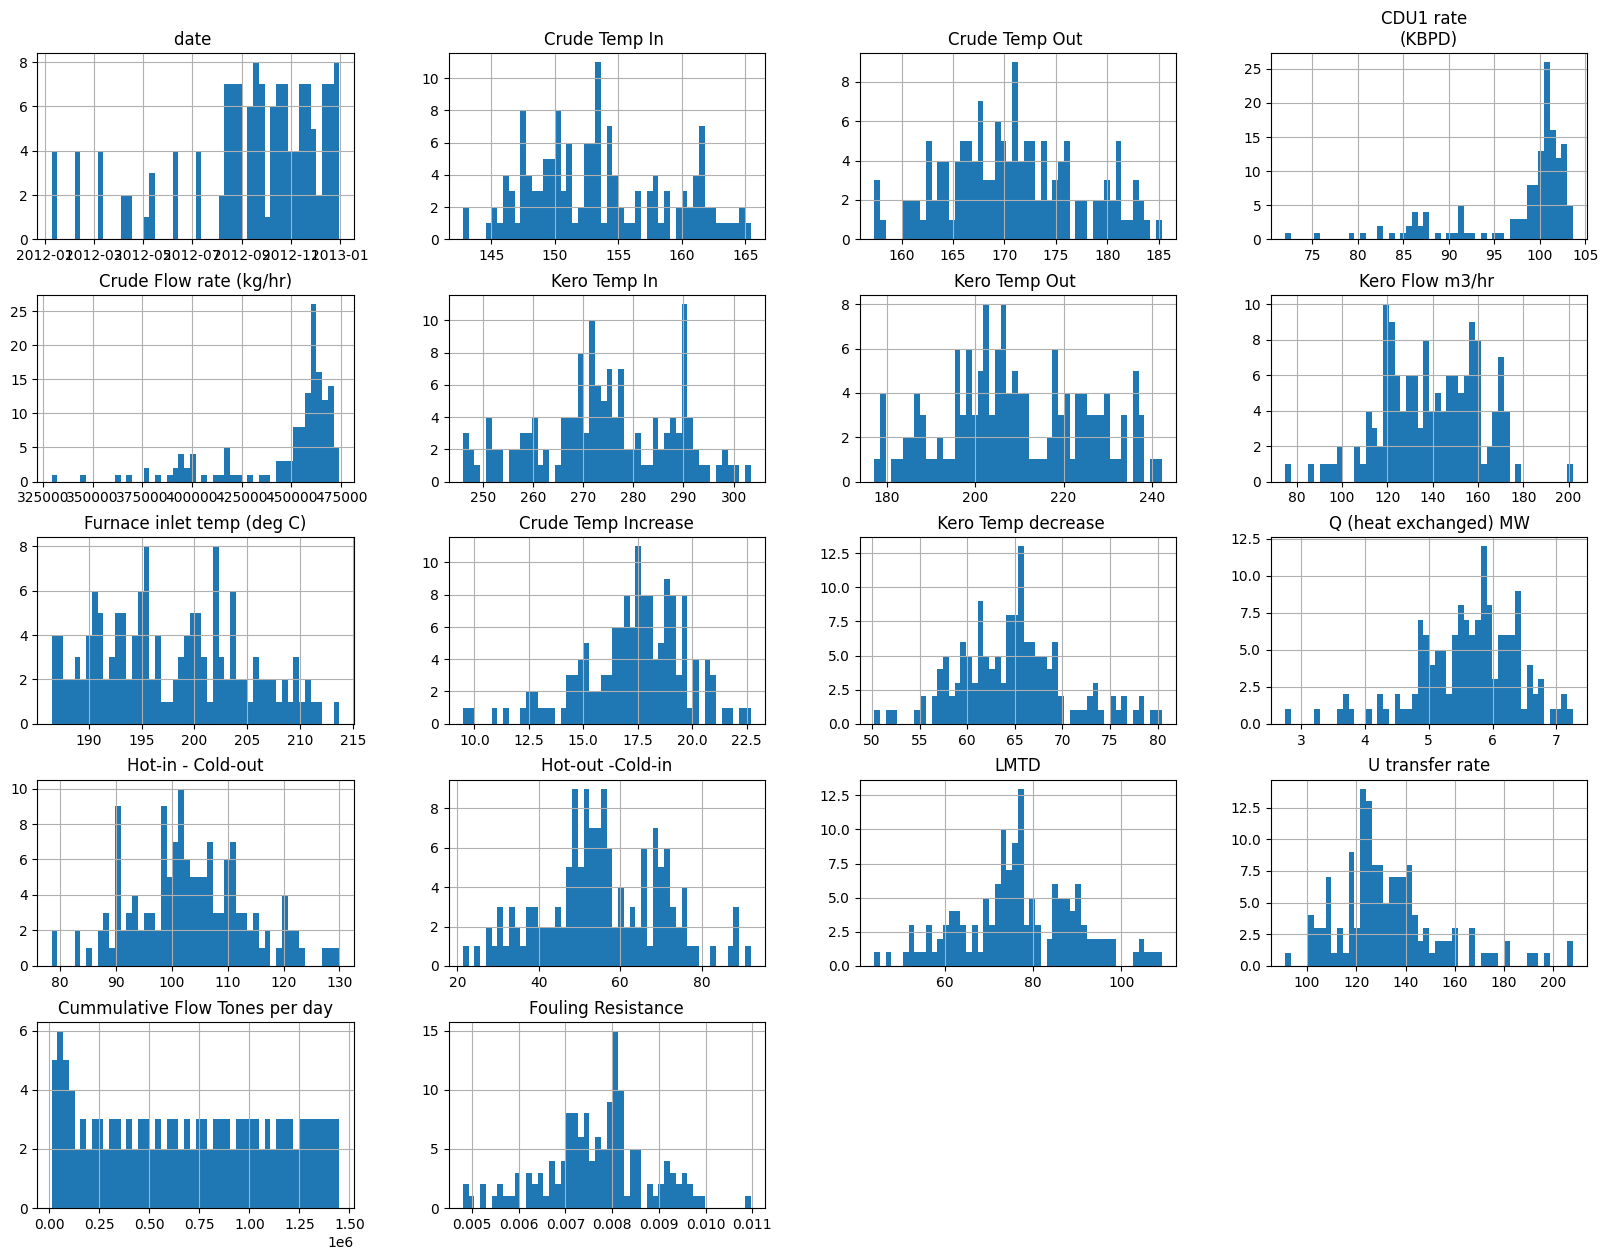

time: 3.48 s (started: 2023-04-21 04:59:50 +00:00)


In [ ]:
Head = df.head()
df.iloc[:,0]
df.iloc[:,0]=pd.to_datetime(df.iloc[:,0],infer_datetime_format=True)
# Data Visualization on the the whole dataset
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            144 non-null    datetime64[ns]
 1   Crude Temp In                   144 non-null    float64       
 2   Crude Temp Out                  144 non-null    float64       
 3   CDU1 rate  
(KBPD)              144 non-null    float64       
 4   Crude Flow rate (kg/hr)         144 non-null    float64       
 5   Kero Temp In                    144 non-null    float64       
 6   Kero Temp Out                   144 non-null    float64       
 7   Kero Flow m3/hr                 144 non-null    float64       
 8   Furnace inlet temp (deg C)      144 non-null    float64       
 9   Crude Temp Increase             144 non-null    float64       
 10   Kero Temp decrease             144 non-null    float64       
 11  Q (hea

In [ ]:
#converting the date parameter to datetime datatype
df['date ']=pd.to_datetime(df['date '],infer_datetime_format=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            144 non-null    datetime64[ns]
 1   Crude Temp In                   144 non-null    float64       
 2   Crude Temp Out                  144 non-null    float64       
 3   CDU1 rate  
(KBPD)              144 non-null    float64       
 4   Crude Flow rate (kg/hr)         144 non-null    float64       
 5   Kero Temp In                    144 non-null    float64       
 6   Kero Temp Out                   144 non-null    float64       
 7   Kero Flow m3/hr                 144 non-null    float64       
 8   Furnace inlet temp (deg C)      144 non-null    float64       
 9   Crude Temp Increase             144 non-null    float64       
 10   Kero Temp decrease             144 non-null    float64       
 11  Q (hea

['date ', 'Crude Temp In ', 'Crude Temp Out ', 'CDU1 rate  \n(KBPD)', 'Crude Flow rate (kg/hr)', 'Kero Temp In ', 'Kero Temp Out ', 'Kero Flow m3/hr ', 'Furnace inlet temp (deg C)', 'Crude Temp Increase', ' Kero Temp decrease', 'Q (heat exchanged) MW', 'Hot-in - Cold-out', 'Hot-out -Cold-in', 'LMTD', 'U transfer rate', 'Cummulative Flow Tones per day', 'Fouling Resistance']


array([<Axes: xlabel='date '>, <Axes: xlabel='date '>,
       <Axes: xlabel='date '>, <Axes: xlabel='date '>,
       <Axes: xlabel='date '>, <Axes: xlabel='date '>,
       <Axes: xlabel='date '>, <Axes: xlabel='date '>,
       <Axes: xlabel='date '>, <Axes: xlabel='date '>,
       <Axes: xlabel='date '>, <Axes: xlabel='date '>,
       <Axes: xlabel='date '>, <Axes: xlabel='date '>,
       <Axes: xlabel='date '>, <Axes: xlabel='date '>,
       <Axes: xlabel='date '>], dtype=object)

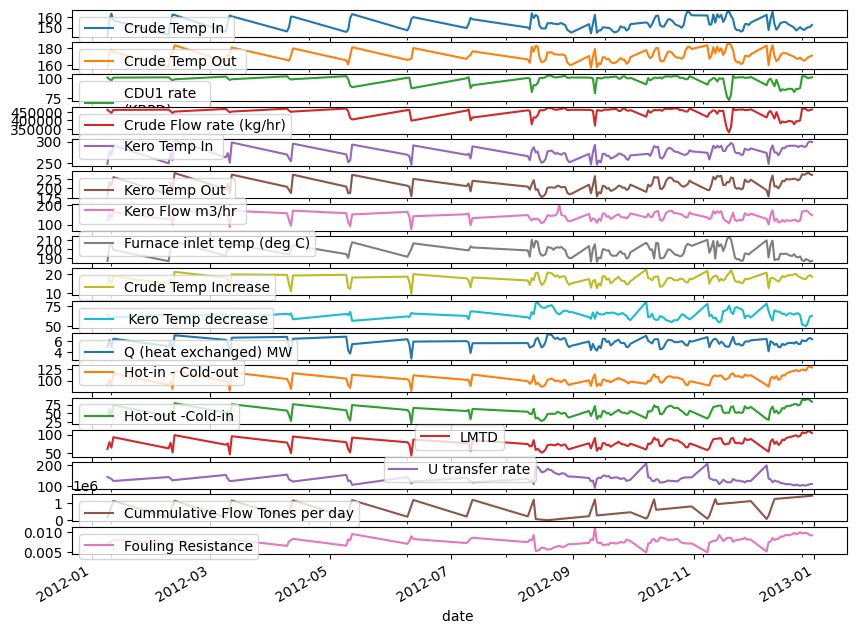

time: 6.6 s (started: 2023-04-21 04:59:53 +00:00)


In [ ]:
print(df.columns.tolist())
df.set_index('date ')[['Crude Temp In ', 'Crude Temp Out ', 'CDU1 rate  \n(KBPD)', 'Crude Flow rate (kg/hr)', 'Kero Temp In ', 'Kero Temp Out ', 'Kero Flow m3/hr ', 'Furnace inlet temp (deg C)', 'Crude Temp Increase', ' Kero Temp decrease', 'Q (heat exchanged) MW', 'Hot-in - Cold-out', 'Hot-out -Cold-in', 'LMTD', 'U transfer rate', 'Cummulative Flow Tones per day','Fouling Resistance']].plot(subplots=True)

In [ ]:
df_input=df[['Crude Temp In ', 'Crude Temp Out ', 'CDU1 rate  \n(KBPD)', 'Crude Flow rate (kg/hr)', 'Kero Temp In ', 'Kero Temp Out ', 'Kero Flow m3/hr ', 'Furnace inlet temp (deg C)', 'Crude Temp Increase', ' Kero Temp decrease', 'Q (heat exchanged) MW', 'Hot-in - Cold-out', 'Hot-out -Cold-in', 'LMTD', 'U transfer rate', 'Cummulative Flow Tones per day','Fouling Resistance']]

time: 1.65 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
df_input

,Crude Temp In,Crude Temp Out,CDU1 rate \n(KBPD),Crude Flow rate (kg/hr),Kero Temp In,Kero Temp Out,Kero Flow m3/hr,Furnace inlet temp (deg C),Crude Temp Increase,Kero Temp decrease,Q (heat exchanged) MW,Hot-in - Cold-out,Hot-out -Cold-in,LMTD,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance
0,154.797468,177.4809,92.3039,422179.6756,271.043339,190.6146,136.8106,207.5520,22.683415,80.428749,6.969547,93.562456,35.817122,60.138664,207.988664,1.062216e+05,0.004808
1,161.205191,183.0916,91.9925,420755.3364,273.865702,196.0065,136.6347,210.7414,21.886404,77.859194,6.701976,90.774108,34.801317,58.382904,206.018413,9.608924e+04,0.004854
2,161.716401,182.7077,91.2404,417315.4098,273.570223,195.3727,128.8922,210.1902,20.991333,78.197497,6.375338,90.862489,33.656324,57.600946,198.638082,8.599111e+04,0.005034
3,161.664472,182.4263,91.1133,416734.0860,274.840761,196.3050,127.0754,209.7074,20.761857,78.535805,6.296860,92.414432,34.640484,58.877303,191.939783,7.597554e+04,0.005210
4,160.344884,181.3518,94.0905,430351.1419,277.083239,197.6055,130.7324,208.2693,21.006871,79.477697,6.579352,95.731484,37.260659,61.965087,190.557021,6.597393e+04,0.005248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,147.816959,165.3204,102.7999,470185.9975,287.728616,236.2713,169.0765,187.1293,17.503472,51.457355,5.989529,122.408186,88.454302,104.513625,102.851032,1.405225e+06,0.009723
140,149.264486,166.9163,101.9233,466176.5803,288.575530,238.3488,172.7897,189.3222,17.651789,50.226779,5.988774,121.659255,89.084265,104.527149,102.824769,1.416414e+06,0.009725
141,150.276124,169.3887,100.1238,457946.2988,297.859970,242.2642,166.8212,188.3233,19.112534,55.595815,6.369885,128.471312,91.988030,109.215960,104.672933,1.427404e+06,0.009554
142,150.637563,170.1837,100.7615,460862.7478,300.153481,237.9598,155.0901,186.5770,19.546166,62.193675,6.555895,129.969752,87.322243,107.236312,109.718283,1.438465e+06,0.009114


time: 28.7 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
df_input.describe()

,Crude Temp In,Crude Temp Out,CDU1 rate \n(KBPD),Crude Flow rate (kg/hr),Kero Temp In,Kero Temp Out,Kero Flow m3/hr,Furnace inlet temp (deg C),Crude Temp Increase,Kero Temp decrease,Q (heat exchanged) MW,Hot-in - Cold-out,Hot-out -Cold-in,LMTD,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,1.440000e+02,144.000000
mean,153.544069,170.877266,97.706931,446891.965429,274.154006,209.392654,139.265844,197.727364,17.335693,64.761350,5.626905,103.276746,55.848587,76.951738,133.282967,7.018133e+05,0.007674
std,5.411791,6.415570,6.401881,29280.922559,13.353951,15.888893,21.530078,6.769450,2.407813,5.717098,0.791494,10.198593,14.447668,13.084653,21.261519,4.393528e+05,0.001108
min,142.756503,157.339800,72.020900,329409.230100,246.013105,177.069800,75.097300,186.486100,9.477060,50.226779,2.753764,78.583708,21.382670,43.947263,91.233181,1.137760e+04,0.004808
25%,149.381263,166.358700,97.360775,445308.771950,266.609215,198.379625,122.457500,192.324575,16.102695,61.092454,5.161457,96.995058,48.096081,69.609184,121.663403,3.087114e+05,0.007086
50%,153.089259,170.680350,100.503100,459681.118250,273.627975,207.073550,139.788200,196.632000,17.603213,64.788801,5.709552,102.713266,54.693614,76.483771,129.361246,7.041816e+05,0.007731
75%,157.745850,175.281075,101.579575,464604.520800,285.443647,222.290100,156.589925,202.599675,18.934527,67.654399,6.164090,109.670054,66.249044,86.410411,141.119314,1.081795e+06,0.008219
max,165.395553,185.295900,103.648300,474066.585900,303.373740,242.264200,201.930800,213.707100,22.683415,80.428749,7.260466,129.969752,91.988030,109.215960,207.988664,1.449615e+06,0.010961


time: 78.8 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
#df_input.query("Fouling Resistance > 0.008220")

time: 231 µs (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
#Transform features by scaling each feature to a given range
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

time: 5.08 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
data_scaled

array([[0.53186705, 0.72045457, 0.64131102, ..., 1.        , 0.06594459,
        0.        ],
       [0.81490556, 0.92115138, 0.63146512, ..., 0.98312497, 0.05889964,
        0.00747298],
       [0.83748647, 0.90741913, 0.60768511, ..., 0.91991312, 0.05187845,
        0.03678337],
       ...,
       [0.33215268, 0.43099359, 0.88856182, ..., 0.11511024, 0.98455719,
        0.77127208],
       [0.34811798, 0.45943104, 0.90872471, ..., 0.1583232 , 0.99224765,
        0.69987291],
       [0.42763503, 0.49591681, 0.93436387, ..., 0.15717503, 1.        ,
        0.70168504]])

time: 4.13 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
features=data_scaled
target=data_scaled[:,16]

time: 466 µs (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
#embed your time series inside a TimeSeriesGenerator object that will later directly be feed inside your network.
TimeseriesGenerator(features,target,length=2,sampling_rate=1,batch_size=1)[16]

(array([[[0.5082423 , 0.54642815, 0.95687916, 0.9568782 , 0.41037719,
          0.39269784, 0.58809069, 0.60225194, 0.71295525, 0.55143099,
          0.7755173 , 0.35716184, 0.38277865, 0.39743188, 0.59298719,
          0.05461613, 0.23140532],
         [0.45655788, 0.52863597, 0.98032402, 0.98032436, 0.47170221,
          0.41128839, 0.55979532, 0.52536645, 0.72304635, 0.62777396,
          0.83676212, 0.4352958 , 0.41651575, 0.44546684, 0.59207941,
          0.06247943, 0.23207475]]]),
 array([0.25006135]))

time: 4.48 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
#No shuffling is allowed
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=123,shuffle=False)

time: 702 µs (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
x_train.shape

(115, 17)

time: 3.11 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
x_test.shape

(29, 17)

time: 2.5 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
y_train.shape

(115,)

time: 2.75 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
y_test.shape

(29,)

time: 4.85 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
x_test

array([[0.7816918 , 0.82845604, 0.8505568 , 0.85055588, 0.90690397,
        0.91448652, 0.75731964, 0.72600566, 0.80036653, 0.3681134 ,
        0.85369415, 0.75798279, 0.77689896, 0.78831459, 0.28220582,
        0.80376093, 0.52734306],
       [0.76462539, 0.79325085, 0.85135673, 0.85135812, 0.85916746,
        0.91007203, 0.76285051, 0.67040888, 0.75509597, 0.28697789,
        0.8103761 , 0.7238496 , 0.77829579, 0.7774693 , 0.25846635,
        0.81131292, 0.55722082],
       [0.8715751 , 0.83950193, 0.52541783, 0.52541839, 0.82275272,
        0.9078019 , 0.60838895, 0.7920723 , 0.66966312, 0.22271949,
        0.58842229, 0.65803881, 0.74190645, 0.73208679, 0.12442589,
        0.81807812, 0.75530419],
       [0.74871733, 0.80607452, 0.4934835 , 0.49348224, 0.78684364,
        0.74013259, 0.5356487 , 0.74758459, 0.80950794, 0.51645103,
        0.69428822, 0.63614134, 0.626481  , 0.65110098, 0.26465379,
        0.82476622, 0.54930286],
       [0.66148149, 0.67178183, 0.6055825 , 0.605583

time: 9.02 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
y_test

array([0.52734306, 0.55722082, 0.75530419, 0.54930286, 0.60196035,
       0.71708785, 1.        , 0.54543984, 0.46757533, 0.50666719,
       0.5544004 , 0.55455349, 0.65096677, 0.64528301, 0.68639974,
       0.72484426, 0.70028198, 0.72034871, 0.74245901, 0.80407104,
       0.73846078, 0.77967616, 0.82954459, 0.77332134, 0.7987762 ,
       0.79917975, 0.77127208, 0.69987291, 0.70168504])

time: 3.37 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
win_length=1
batch_size=3    #number of samples processed before the model is updated
num_features=17
train_generator=TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

time: 672 µs (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
train_generator[0]

(array([[[0.53186705, 0.72045457, 0.64131102, 0.64131164, 0.43636605,
          0.20776018, 0.4865694 , 0.77388413, 1.        , 1.        ,
          0.93544753, 0.29149447, 0.20443847, 0.24807299, 1.        ,
          0.06594459, 0.        ]],
 
        [[0.81490556, 0.92115138, 0.63146512, 0.63146534, 0.48556989,
          0.29046513, 0.48518254, 0.89105103, 0.93964946, 0.91492096,
          0.87607564, 0.23723172, 0.1900514 , 0.2211725 , 0.98312497,
          0.05889964, 0.00747298]],
 
        [[0.83748647, 0.90741913, 0.60768511, 0.60768551, 0.48041864,
          0.28074344, 0.42413794, 0.87080195, 0.87187369, 0.92612232,
          0.80359753, 0.23895166, 0.1738346 , 0.2091919 , 0.91991312,
          0.05187845, 0.03678337]]]),
 array([0.00747298, 0.03678337, 0.06533641]))

time: 7.34 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
test_generator[0]

(array([[[0.7816918 , 0.82845604, 0.8505568 , 0.85055588, 0.90690397,
          0.91448652, 0.75731964, 0.72600566, 0.80036653, 0.3681134 ,
          0.85369415, 0.75798279, 0.77689896, 0.78831459, 0.28220582,
          0.80376093, 0.52734306]],
 
        [[0.76462539, 0.79325085, 0.85135673, 0.85135812, 0.85916746,
          0.91007203, 0.76285051, 0.67040888, 0.75509597, 0.28697789,
          0.8103761 , 0.7238496 , 0.77829579, 0.7774693 , 0.25846635,
          0.81131292, 0.55722082]],
 
        [[0.8715751 , 0.83950193, 0.52541783, 0.52541839, 0.82275272,
          0.9078019 , 0.60838895, 0.7920723 , 0.66966312, 0.22271949,
          0.58842229, 0.65803881, 0.74190645, 0.73208679, 0.12442589,
          0.81807812, 0.75530419]]]),
 array([0.55722082, 0.75530419, 0.54930286]))

time: 5.94 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=1))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))   #it has a small slope for negative values instead of a flat slope.
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))   #Dropout refers to data, or noise, that's intentionally dropped from a neural network to improve processing and time to results
model.add(tf.keras.layers.Dense(1))


time: 939 ms (started: 2023-04-21 05:00:00 +00:00)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            74752     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1, 128)            0         
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_lose',patience=2,mode='min')
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history=model.fit_generator(train_generator,epochs=50,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])

Epoch 1/50


<ipython-input-31-16c2f6390969>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=50,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])


32/38 [========================>.....] - ETA: 0s - loss: 0.0614 - mean_absolute_error: 0.2239

38/38 [==============================] - 6s 43ms/step - loss: 0.0561 - mean_absolute_error: 0.2090 - val_loss: 0.0403 - val_mean_absolute_error: 0.1744
Epoch 2/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0531 - mean_absolute_error: 0.2028

38/38 [==============================] - 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.1919 - val_loss: 0.0380 - val_mean_absolute_error: 0.1681
Epoch 3/50
32/38 [========================>.....] - ETA: 0s - loss: 0.0341 - mean_absolute_error: 0.1465

38/38 [==============================] - 0s 7ms/step - loss: 0.0303 - mean_absolute_error: 0.1369 - val_loss: 0.0280 - val_mean_absolute_error: 0.1428
Epoch 4/50
31/38 [=======================>......] - ETA: 0s - loss: 0.0324 - mean_absolute_error: 0.1427

38/38 [==============================] - 0s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.1325 - val_loss: 0.0263 - val_mean_absolute_error: 0.1383
Epoch 5/50
32/38 [========================>.....] - ETA: 0s - loss: 0.0233 - mean_absolute_error: 0.1186

38/38 [==============================] - 0s 9ms/step - loss: 0.0210 - mean_absolute_error: 0.1135 - val_loss: 0.0219 - val_mean_absolute_error: 0.1249
Epoch 6/50
29/38 [=====================>........] - ETA: 0s - loss: 0.0216 - mean_absolute_error: 0.1171

38/38 [==============================] - 0s 8ms/step - loss: 0.0195 - mean_absolute_error: 0.1106 - val_loss: 0.0163 - val_mean_absolute_error: 0.1059
Epoch 7/50
28/38 [=====================>........] - ETA: 0s - loss: 0.0156 - mean_absolute_error: 0.1004

38/38 [==============================] - 0s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.1009 - val_loss: 0.0156 - val_mean_absolute_error: 0.1032
Epoch 8/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0118 - mean_absolute_error: 0.0873

38/38 [==============================] - 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0860 - val_loss: 0.0151 - val_mean_absolute_error: 0.1015
Epoch 9/50
31/38 [=======================>......] - ETA: 0s - loss: 0.0081 - mean_absolute_error: 0.0751

38/38 [==============================] - 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0777 - val_loss: 0.0201 - val_mean_absolute_error: 0.1174
Epoch 10/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0049 - mean_absolute_error: 0.0571

38/38 [==============================] - 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0581 - val_loss: 0.0167 - val_mean_absolute_error: 0.1074
Epoch 11/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0060 - mean_absolute_error: 0.0585

38/38 [==============================] - 0s 9ms/step - loss: 0.0058 - mean_absolute_error: 0.0582 - val_loss: 0.0180 - val_mean_absolute_error: 0.1117
Epoch 12/50
37/38 [============================>.] - ETA: 0s - loss: 0.0042 - mean_absolute_error: 0.0507

38/38 [==============================] - 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0533 - val_loss: 0.0170 - val_mean_absolute_error: 0.1087
Epoch 13/50
37/38 [============================>.] - ETA: 0s - loss: 0.0046 - mean_absolute_error: 0.0538

38/38 [==============================] - 0s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0537 - val_loss: 0.0212 - val_mean_absolute_error: 0.1228
Epoch 14/50
31/38 [=======================>......] - ETA: 0s - loss: 0.0042 - mean_absolute_error: 0.0489

38/38 [==============================] - 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0539 - val_loss: 0.0225 - val_mean_absolute_error: 0.1273
Epoch 15/50
34/38 [=========================>....] - ETA: 0s - loss: 0.0042 - mean_absolute_error: 0.0519

38/38 [==============================] - 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0537 - val_loss: 0.0214 - val_mean_absolute_error: 0.1239
Epoch 16/50
36/38 [===========================>..] - ETA: 0s - loss: 0.0052 - mean_absolute_error: 0.0562

38/38 [==============================] - 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0565 - val_loss: 0.0182 - val_mean_absolute_error: 0.1135
Epoch 17/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0037 - mean_absolute_error: 0.0456

38/38 [==============================] - 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0477 - val_loss: 0.0259 - val_mean_absolute_error: 0.1387
Epoch 18/50
32/38 [========================>.....] - ETA: 0s - loss: 0.0040 - mean_absolute_error: 0.0473

38/38 [==============================] - 0s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0502 - val_loss: 0.0219 - val_mean_absolute_error: 0.1259
Epoch 19/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0050 - mean_absolute_error: 0.0572

38/38 [==============================] - 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0575 - val_loss: 0.0219 - val_mean_absolute_error: 0.1262
Epoch 20/50
36/38 [===========================>..] - ETA: 0s - loss: 0.0040 - mean_absolute_error: 0.0481

38/38 [==============================] - 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0492 - val_loss: 0.0164 - val_mean_absolute_error: 0.1070
Epoch 21/50
37/38 [============================>.] - ETA: 0s - loss: 0.0048 - mean_absolute_error: 0.0519

38/38 [==============================] - 0s 8ms/step - loss: 0.0047 - mean_absolute_error: 0.0517 - val_loss: 0.0175 - val_mean_absolute_error: 0.1104
Epoch 22/50
37/38 [============================>.] - ETA: 0s - loss: 0.0049 - mean_absolute_error: 0.0526

38/38 [==============================] - 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0529 - val_loss: 0.0183 - val_mean_absolute_error: 0.1139
Epoch 23/50
30/38 [======================>.......] - ETA: 0s - loss: 0.0049 - mean_absolute_error: 0.0521

38/38 [==============================] - 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0582 - val_loss: 0.0252 - val_mean_absolute_error: 0.1390
Epoch 24/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0039 - mean_absolute_error: 0.0495

38/38 [==============================] - 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0491 - val_loss: 0.0197 - val_mean_absolute_error: 0.1183
Epoch 25/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0064 - mean_absolute_error: 0.0650

38/38 [==============================] - 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0648 - val_loss: 0.0189 - val_mean_absolute_error: 0.1156
Epoch 26/50
33/38 [=========================>....] - ETA: 0s - loss: 0.0033 - mean_absolute_error: 0.0432

38/38 [==============================] - 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0462 - val_loss: 0.0185 - val_mean_absolute_error: 0.1139
Epoch 27/50
36/38 [===========================>..] - ETA: 0s - loss: 0.0039 - mean_absolute_error: 0.0479

38/38 [==============================] - 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0495 - val_loss: 0.0220 - val_mean_absolute_error: 0.1269
Epoch 28/50
32/38 [========================>.....] - ETA: 0s - loss: 0.0039 - mean_absolute_error: 0.0491

38/38 [==============================] - 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0498 - val_loss: 0.0175 - val_mean_absolute_error: 0.1100
Epoch 29/50
34/38 [=========================>....] - ETA: 0s - loss: 0.0035 - mean_absolute_error: 0.0473

38/38 [==============================] - 0s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0472 - val_loss: 0.0188 - val_mean_absolute_error: 0.1151
Epoch 30/50
37/38 [============================>.] - ETA: 0s - loss: 0.0037 - mean_absolute_error: 0.0458

38/38 [==============================] - 0s 9ms/step - loss: 0.0036 - mean_absolute_error: 0.0455 - val_loss: 0.0161 - val_mean_absolute_error: 0.1038
Epoch 31/50
38/38 [==============================] - ETA: 0s - loss: 0.0038 - mean_absolute_error: 0.0475

38/38 [==============================] - 0s 10ms/step - loss: 0.0038 - mean_absolute_error: 0.0475 - val_loss: 0.0200 - val_mean_absolute_error: 0.1200
Epoch 32/50
33/38 [=========================>....] - ETA: 0s - loss: 0.0032 - mean_absolute_error: 0.0431

38/38 [==============================] - 0s 11ms/step - loss: 0.0037 - mean_absolute_error: 0.0468 - val_loss: 0.0190 - val_mean_absolute_error: 0.1152
Epoch 33/50
38/38 [==============================] - ETA: 0s - loss: 0.0050 - mean_absolute_error: 0.0546

38/38 [==============================] - 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0546 - val_loss: 0.0186 - val_mean_absolute_error: 0.1139
Epoch 34/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0046 - mean_absolute_error: 0.0538

38/38 [==============================] - 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0545 - val_loss: 0.0208 - val_mean_absolute_error: 0.1216
Epoch 35/50
38/38 [==============================] - ETA: 0s - loss: 0.0048 - mean_absolute_error: 0.0534

38/38 [==============================] - 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0534 - val_loss: 0.0169 - val_mean_absolute_error: 0.1077
Epoch 36/50
30/38 [======================>.......] - ETA: 0s - loss: 0.0036 - mean_absolute_error: 0.0492

38/38 [==============================] - 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0500 - val_loss: 0.0171 - val_mean_absolute_error: 0.1084
Epoch 37/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0048 - mean_absolute_error: 0.0528

38/38 [==============================] - 0s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0520 - val_loss: 0.0194 - val_mean_absolute_error: 0.1165
Epoch 38/50
33/38 [=========================>....] - ETA: 0s - loss: 0.0057 - mean_absolute_error: 0.0614

38/38 [==============================] - 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0625 - val_loss: 0.0186 - val_mean_absolute_error: 0.1142
Epoch 39/50
36/38 [===========================>..] - ETA: 0s - loss: 0.0043 - mean_absolute_error: 0.0510

38/38 [==============================] - 0s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0515 - val_loss: 0.0193 - val_mean_absolute_error: 0.1165
Epoch 40/50
36/38 [===========================>..] - ETA: 0s - loss: 0.0048 - mean_absolute_error: 0.0538

38/38 [==============================] - 0s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0520 - val_loss: 0.0180 - val_mean_absolute_error: 0.1120
Epoch 41/50
33/38 [=========================>....] - ETA: 0s - loss: 0.0043 - mean_absolute_error: 0.0513

38/38 [==============================] - 0s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0532 - val_loss: 0.0154 - val_mean_absolute_error: 0.1026
Epoch 42/50
34/38 [=========================>....] - ETA: 0s - loss: 0.0040 - mean_absolute_error: 0.0470

38/38 [==============================] - 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0487 - val_loss: 0.0139 - val_mean_absolute_error: 0.0953
Epoch 43/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0042 - mean_absolute_error: 0.0507

38/38 [==============================] - 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0510 - val_loss: 0.0189 - val_mean_absolute_error: 0.1151
Epoch 44/50
30/38 [======================>.......] - ETA: 0s - loss: 0.0033 - mean_absolute_error: 0.0438

38/38 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0454 - val_loss: 0.0197 - val_mean_absolute_error: 0.1180
Epoch 45/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0034 - mean_absolute_error: 0.0443

38/38 [==============================] - 0s 9ms/step - loss: 0.0033 - mean_absolute_error: 0.0435 - val_loss: 0.0180 - val_mean_absolute_error: 0.1116
Epoch 46/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0034 - mean_absolute_error: 0.0476

38/38 [==============================] - 0s 9ms/step - loss: 0.0035 - mean_absolute_error: 0.0480 - val_loss: 0.0210 - val_mean_absolute_error: 0.1230
Epoch 47/50
28/38 [=====================>........] - ETA: 0s - loss: 0.0036 - mean_absolute_error: 0.0459

38/38 [==============================] - 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0497 - val_loss: 0.0195 - val_mean_absolute_error: 0.1173
Epoch 48/50
30/38 [======================>.......] - ETA: 0s - loss: 0.0039 - mean_absolute_error: 0.0468

38/38 [==============================] - 0s 8ms/step - loss: 0.0041 - mean_absolute_error: 0.0493 - val_loss: 0.0172 - val_mean_absolute_error: 0.1087
Epoch 49/50
34/38 [=========================>....] - ETA: 0s - loss: 0.0054 - mean_absolute_error: 0.0566

38/38 [==============================] - 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0551 - val_loss: 0.0188 - val_mean_absolute_error: 0.1146
Epoch 50/50
35/38 [==========================>...] - ETA: 0s - loss: 0.0041 - mean_absolute_error: 0.0494

38/38 [==============================] - 0s 8ms/step - loss: 0.0041 - mean_absolute_error: 0.0494 - val_loss: 0.0217 - val_mean_absolute_error: 0.1263
time: 26 s (started: 2023-04-21 05:00:01 +00:00)


In [ ]:
model.evaluate_generator(test_generator,verbose=0)

<ipython-input-32-b08afc977308>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator,verbose=0)


[0.021693844348192215, 0.12625744938850403]

time: 118 ms (started: 2023-04-21 05:00:27 +00:00)


In [ ]:
predictions=model.predict_generator(test_generator)


<ipython-input-33-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


time: 1.22 s (started: 2023-04-21 05:00:27 +00:00)


In [ ]:
model.evaluate_generator(train_generator,verbose=0)

<ipython-input-34-21b4ef9c1a24>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator,verbose=0)


[0.002773161279037595, 0.03955220803618431]

time: 116 ms (started: 2023-04-21 05:00:28 +00:00)


In [ ]:
pred=model.predict_generator(train_generator)

<ipython-input-35-bdc6f68b727c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(train_generator)


time: 186 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
#train_generator.len

time: 225 µs (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
pred.size

114

time: 4.49 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
predictions.size

28

time: 2.64 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
#result = np.r_[pred,[predictions]]

time: 263 µs (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
df['Fouling Resistance']

0      0.004808
1      0.004854
2      0.005034
3      0.005210
4      0.005248
         ...   
139    0.009723
140    0.009725
141    0.009554
142    0.009114
143    0.009125
Name: Fouling Resistance, Length: 144, dtype: float64

time: 11.6 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
predictions.shape[0]

28

time: 3.55 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
predictions

array([[0.52143943],
       [0.53432894],
       [0.6131044 ],
       [0.5340935 ],
       [0.5569618 ],
       [0.60169744],
       [0.6804911 ],
       [0.52351576],
       [0.49122563],
       [0.50866383],
       [0.53293544],
       [0.5355538 ],
       [0.5742711 ],
       [0.5731488 ],
       [0.5911616 ],
       [0.60315466],
       [0.5956258 ],
       [0.60188425],
       [0.60817796],
       [0.6248001 ],
       [0.60631657],
       [0.6207641 ],
       [0.63657975],
       [0.6178981 ],
       [0.62386143],
       [0.6254956 ],
       [0.6179022 ],
       [0.5952807 ]], dtype=float32)

time: 3.83 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
y_test

array([0.52734306, 0.55722082, 0.75530419, 0.54930286, 0.60196035,
       0.71708785, 1.        , 0.54543984, 0.46757533, 0.50666719,
       0.5544004 , 0.55455349, 0.65096677, 0.64528301, 0.68639974,
       0.72484426, 0.70028198, 0.72034871, 0.74245901, 0.80407104,
       0.73846078, 0.77967616, 0.82954459, 0.77332134, 0.7987762 ,
       0.79917975, 0.77127208, 0.69987291, 0.70168504])

time: 2.83 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
x_test

array([[0.7816918 , 0.82845604, 0.8505568 , 0.85055588, 0.90690397,
        0.91448652, 0.75731964, 0.72600566, 0.80036653, 0.3681134 ,
        0.85369415, 0.75798279, 0.77689896, 0.78831459, 0.28220582,
        0.80376093, 0.52734306],
       [0.76462539, 0.79325085, 0.85135673, 0.85135812, 0.85916746,
        0.91007203, 0.76285051, 0.67040888, 0.75509597, 0.28697789,
        0.8103761 , 0.7238496 , 0.77829579, 0.7774693 , 0.25846635,
        0.81131292, 0.55722082],
       [0.8715751 , 0.83950193, 0.52541783, 0.52541839, 0.82275272,
        0.9078019 , 0.60838895, 0.7920723 , 0.66966312, 0.22271949,
        0.58842229, 0.65803881, 0.74190645, 0.73208679, 0.12442589,
        0.81807812, 0.75530419],
       [0.74871733, 0.80607452, 0.4934835 , 0.49348224, 0.78684364,
        0.74013259, 0.5356487 , 0.74758459, 0.80950794, 0.51645103,
        0.69428822, 0.63614134, 0.626481  , 0.65110098, 0.26465379,
        0.82476622, 0.54930286],
       [0.66148149, 0.67178183, 0.6055825 , 0.605583

time: 13 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
x_train[:,1:][win_length:]

array([[0.92115138, 0.63146512, 0.63146534, ..., 0.98312497, 0.05889964,
        0.00747298],
       [0.90741913, 0.60768511, 0.60768551, ..., 0.91991312, 0.05187845,
        0.03678337],
       [0.89735335, 0.60366644, 0.60366689, ..., 0.86254281, 0.04491467,
        0.06533641],
       ...,
       [0.54847064, 0.9441655 , 0.94416544, ..., 0.28494889, 0.78095453,
        0.52397655],
       [0.65703728, 0.91664822, 0.91664682, ..., 0.28076203, 0.78866412,
        0.52912203],
       [0.92055043, 0.84919405, 0.84919539, ..., 0.32008254, 0.79621088,
        0.48233926]])

time: 3.75 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
df_pred=pd.concat([pd.DataFrame(x_test[:,1:][win_length:]),pd.DataFrame(predictions)],axis=1)

time: 1.19 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
pd.DataFrame(predictions)

,0
0,0.521439
1,0.534329
2,0.613104
3,0.534093
4,0.556962
5,0.601697
6,0.680491
7,0.523516
8,0.491226
9,0.508664


time: 11.2 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
pd.DataFrame(x_test[:,1:][win_length:])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.793251,0.851357,0.851358,0.859167,0.910072,0.762851,0.670409,0.755096,0.286978,0.810376,0.723850,0.778296,0.777469,0.258466,0.811313,0.557221
1,0.839502,0.525418,0.525418,0.822753,0.907802,0.608389,0.792072,0.669663,0.222719,0.588422,0.658039,0.741906,0.732087,0.124426,0.818078,0.755304
2,0.806075,0.493483,0.493482,0.786844,0.740133,0.535649,0.747585,0.809508,0.516451,0.694288,0.636141,0.626481,0.651101,0.264654,0.824766,0.549303
3,0.671782,0.605583,0.605584,0.748597,0.663256,0.458144,0.579751,0.674776,0.609761,0.627279,0.666508,0.583467,0.632830,0.224836,0.831725,0.601960
4,0.657599,0.611906,0.611905,0.715166,0.689679,0.436777,0.575570,0.561161,0.489229,0.528730,0.636907,0.592230,0.628933,0.147527,0.838699,0.717088
5,0.770233,0.277541,0.277540,0.807088,0.853702,0.410854,0.708644,0.578313,0.309748,0.410338,0.678238,0.702293,0.713987,0.000000,0.844866,1.000000
6,0.670165,0.919361,0.919360,0.762025,0.818383,0.678163,0.128239,0.692335,0.300404,0.779381,0.682377,0.730630,0.733343,0.267699,0.852582,0.545440
7,0.590937,0.874011,0.874012,0.678275,0.717899,0.638876,0.123765,0.748444,0.358248,0.814202,0.631994,0.679713,0.683955,0.333103,0.860189,0.467575
8,0.481945,0.564476,0.564475,0.504997,0.429848,0.342471,0.060093,0.617567,0.650942,0.559467,0.497863,0.432412,0.476255,0.299279,0.867048,0.506667
9,0.267612,0.828974,0.828974,0.498463,0.443135,0.434213,0.098351,0.555962,0.609854,0.609383,0.607176,0.518022,0.569697,0.260662,0.874546,0.554400


time: 49.7 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
df_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0
0,0.793251,0.851357,0.851358,0.859167,0.910072,0.762851,0.670409,0.755096,0.286978,0.810376,0.723850,0.778296,0.777469,0.258466,0.811313,0.557221,0.521439
1,0.839502,0.525418,0.525418,0.822753,0.907802,0.608389,0.792072,0.669663,0.222719,0.588422,0.658039,0.741906,0.732087,0.124426,0.818078,0.755304,0.534329
2,0.806075,0.493483,0.493482,0.786844,0.740133,0.535649,0.747585,0.809508,0.516451,0.694288,0.636141,0.626481,0.651101,0.264654,0.824766,0.549303,0.613104
3,0.671782,0.605583,0.605584,0.748597,0.663256,0.458144,0.579751,0.674776,0.609761,0.627279,0.666508,0.583467,0.632830,0.224836,0.831725,0.601960,0.534093
4,0.657599,0.611906,0.611905,0.715166,0.689679,0.436777,0.575570,0.561161,0.489229,0.528730,0.636907,0.592230,0.628933,0.147527,0.838699,0.717088,0.556962
5,0.770233,0.277541,0.277540,0.807088,0.853702,0.410854,0.708644,0.578313,0.309748,0.410338,0.678238,0.702293,0.713987,0.000000,0.844866,1.000000,0.601697
6,0.670165,0.919361,0.919360,0.762025,0.818383,0.678163,0.128239,0.692335,0.300404,0.779381,0.682377,0.730630,0.733343,0.267699,0.852582,0.545440,0.680491
7,0.590937,0.874011,0.874012,0.678275,0.717899,0.638876,0.123765,0.748444,0.358248,0.814202,0.631994,0.679713,0.683955,0.333103,0.860189,0.467575,0.523516
8,0.481945,0.564476,0.564475,0.504997,0.429848,0.342471,0.060093,0.617567,0.650942,0.559467,0.497863,0.432412,0.476255,0.299279,0.867048,0.506667,0.491226
9,0.267612,0.828974,0.828974,0.498463,0.443135,0.434213,0.098351,0.555962,0.609854,0.609383,0.607176,0.518022,0.569697,0.260662,0.874546,0.554400,0.508664


time: 46.7 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

time: 4.06 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
y_test

array([0.52734306, 0.55722082, 0.75530419, 0.54930286, 0.60196035,
       0.71708785, 1.        , 0.54543984, 0.46757533, 0.50666719,
       0.5544004 , 0.55455349, 0.65096677, 0.64528301, 0.68639974,
       0.72484426, 0.70028198, 0.72034871, 0.74245901, 0.80407104,
       0.73846078, 0.77967616, 0.82954459, 0.77332134, 0.7987762 ,
       0.79917975, 0.77127208, 0.69987291, 0.70168504])

time: 2.89 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
rev_trans[:,16]

array([0.00801636, 0.00809566, 0.00858037, 0.00809422, 0.00823492,
       0.00851018, 0.008995  , 0.00802913, 0.00783045, 0.00793775,
       0.00808709, 0.0081032 , 0.00834143, 0.00833452, 0.00844535,
       0.00851915, 0.00847282, 0.00851133, 0.00855005, 0.00865233,
       0.0085386 , 0.0086275 , 0.00872481, 0.00860986, 0.00864655,
       0.00865661, 0.00860989, 0.0084707 ])

time: 5.47 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
rev_trans

array([[1.60714949e+02, 1.81140414e+02, 9.89471439e+01, 4.53694123e+05,
        2.98215415e+02, 2.26803381e+02, 1.60127604e+02, 2.07040567e+02,
        1.32669918e+01, 7.47017336e+01, 6.01593816e+00, 1.18577250e+02,
        7.62761699e+01, 6.08170247e+01, 1.85958413e+02, 8.12793245e+05,
        8.01635519e-03],
       [1.61762029e+02, 1.72028434e+02, 8.86385175e+01, 4.48426463e+05,
        2.98085198e+02, 2.16733353e+02, 1.75558602e+02, 2.04715000e+02,
        1.24183726e+01, 6.79982910e+01, 5.71934858e+00, 1.16707346e+02,
        7.30719212e+01, 5.20683789e+01, 1.86748287e+02, 1.09768408e+06,
        8.09566392e-03],
       [1.61005265e+02, 1.71135674e+02, 8.76284603e+01, 4.43231951e+05,
        2.88467580e+02, 2.11991096e+02, 1.69916070e+02, 2.08521716e+02,
        1.62974956e+01, 7.11956508e+01, 5.62066319e+00, 1.10776088e+02,
        6.73538892e+01, 6.12208708e+01, 1.87529160e+02, 8.01405335e+05,
        8.58036700e-03],
       [1.57965006e+02, 1.74269525e+02, 9.11739395e+01, 4.376

time: 10.8 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

time: 596 µs (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
df_final.count()

Crude Temp In                     28
Crude Temp Out                    28
CDU1 rate  \n(KBPD)               28
Crude Flow rate (kg/hr)           28
Kero Temp In                      28
Kero Temp Out                     28
Kero Flow m3/hr                   28
Furnace inlet temp (deg C)        28
Crude Temp Increase               28
 Kero Temp decrease               28
Q (heat exchanged) MW             28
Hot-in - Cold-out                 28
Hot-out -Cold-in                  28
LMTD                              28
U transfer rate                   28
Cummulative Flow Tones per day    28
Fouling Resistance                28
dtype: int64

time: 5.96 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
df_final['App_Pred']=rev_trans[:,16]

time: 1.21 ms (started: 2023-04-21 05:00:29 +00:00)


<ipython-input-56-4b6feb283f9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']=rev_trans[:,16]


In [ ]:
df_final

,Crude Temp In,Crude Temp Out,CDU1 rate \n(KBPD),Crude Flow rate (kg/hr),Kero Temp In,Kero Temp Out,Kero Flow m3/hr,Furnace inlet temp (deg C),Crude Temp Increase,Kero Temp decrease,Q (heat exchanged) MW,Hot-in - Cold-out,Hot-out -Cold-in,LMTD,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance,App_Pred
116,160.066896,179.5160,98.9471,452564.4449,295.295496,236.4014,171.8523,204.7353,19.449125,58.894076,6.405887,115.779475,76.334524,94.691671,121.410544,1178237.921,0.008237,0.008016
117,162.488135,180.8090,88.6385,405414.8646,293.206724,236.2534,152.2614,208.0471,18.320869,56.953346,5.405608,112.397719,73.765242,91.729614,105.760586,1187967.877,0.009455,0.008096
118,159.706752,179.8745,87.6285,400795.0665,291.146956,225.3223,143.0355,206.8361,20.167709,65.824617,5.882714,111.272495,65.615586,86.443776,122.132962,1197586.959,0.008188,0.008580
119,157.731816,176.1202,91.1739,417011.3739,288.953123,220.3104,133.2053,202.2675,18.388391,68.642755,5.580722,112.832915,62.578552,85.251229,117.483985,1207595.232,0.008512,0.008094
120,158.835713,175.7237,91.3739,417925.7817,287.035495,222.0330,130.4953,202.1537,16.887957,65.002472,5.136592,111.311825,63.197310,84.996900,108.457820,1217625.451,0.009220,0.008235
121,161.758073,178.8725,80.7988,369557.4506,292.308209,232.7264,127.2073,205.7761,17.114468,59.581791,4.603034,113.435667,70.968344,90.548288,91.233181,1226494.830,0.010961,0.008510
122,157.454697,176.0750,101.0979,462401.4372,289.723350,230.4238,161.1111,189.9769,18.620283,59.299567,6.266200,113.648369,72.969086,91.811627,122.488539,1237592.464,0.008164,0.008995
123,154.498782,173.8601,99.6636,455841.5065,284.919414,223.8728,156.1282,189.8551,19.361274,61.046568,6.423128,111.059357,69.374064,88.588120,130.124778,1248532.660,0.007685,0.008029
124,153.180257,170.8131,89.8738,411064.7400,274.980058,205.0935,118.5341,188.1219,17.632866,69.886519,5.275115,104.166936,51.913283,75.031802,126.175616,1258398.214,0.007925,0.007830
125,148.001891,164.8212,98.2392,449326.3785,274.605240,205.9597,130.1700,189.1633,16.819288,68.645562,5.500071,109.784061,57.957786,81.130619,121.666891,1269182.047,0.008219,0.007938


time: 41.2 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
df_final.shape

(28, 18)

time: 6.27 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
from google.colab import files
df_final.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 12.8 ms (started: 2023-04-21 05:00:29 +00:00)


<Axes: >

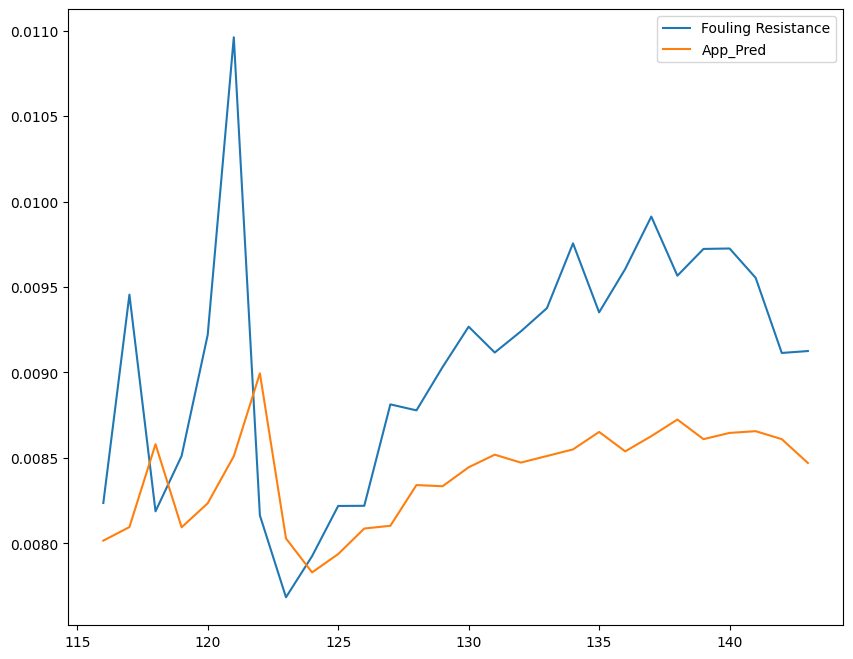

time: 384 ms (started: 2023-04-21 05:00:29 +00:00)


In [ ]:
df_final[['Fouling Resistance','App_Pred']].plot()

In [ ]:
y_test = np.delete(y_test,0,0)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, df_final['App_Pred']))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, df_final['App_Pred']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, df_final['App_Pred'])))
print("(R^2) Score:", round(metrics.r2_score(y_test,df_final['App_Pred']), 4))
#print("Accuracy:", round(metrics.accuracy_score(df[0],df_final['App_Pred']), 2))

Mean Absolute Error: 0.6835974946946726
Mean Squared Error: 0.4806942157641639
Root Mean Squared Error: 0.6933211490818406
(R^2) Score: -34.8139
time: 6.31 ms (started: 2023-04-21 05:03:51 +00:00)
